Importando as bibliotecas necessárias

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Visualizando a base e suas informações principais

In [31]:
data = pd.read_csv('air_quality_health_impact_data.csv')
df = pd.DataFrame(data)
df

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


Verificando se há dados faltantes

In [32]:
print(df.isnull().sum())

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


Ver possíveis relações entre saúde e métricas da qualidade do ar

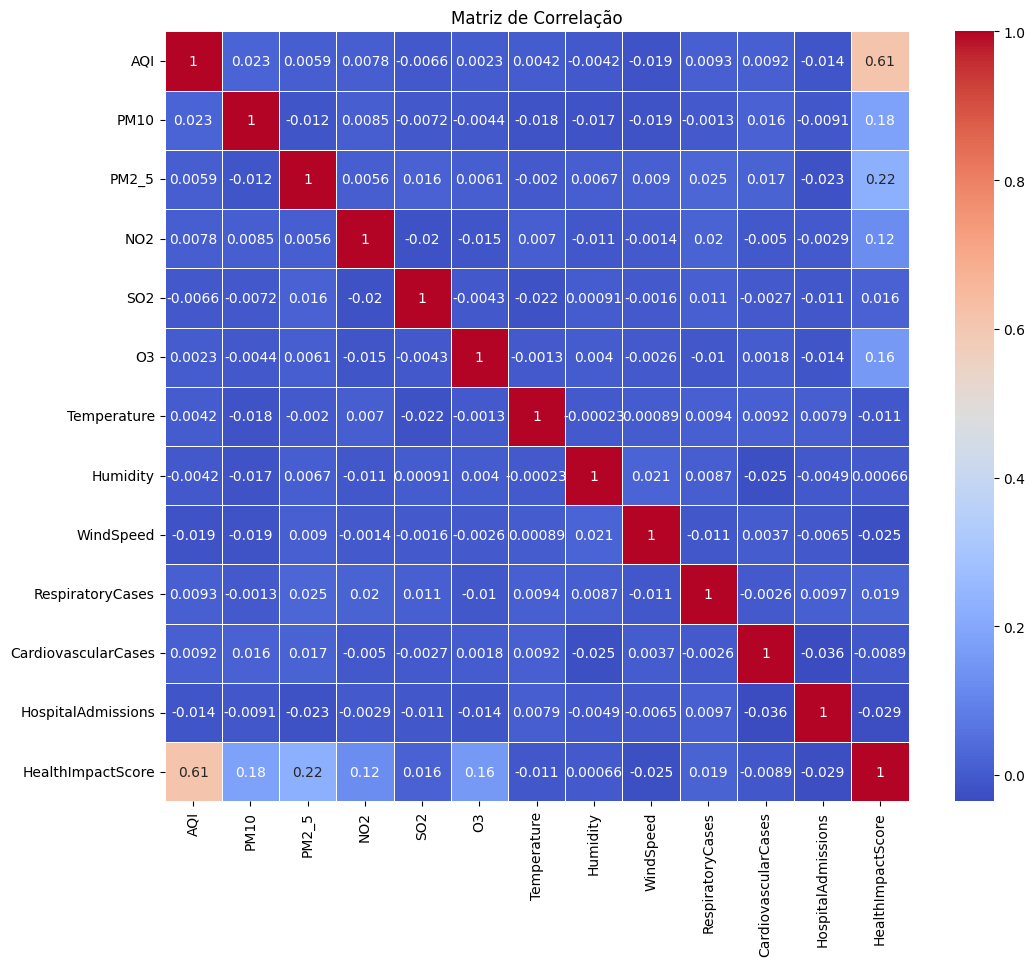

Média das correlações: 0.026446764420489686
Mediana das correlações: 0.009203472145175919


In [35]:
# Apagando as colunas de ID e class de Health Impact para visualizar as correlações dos dados 'reais'

df_only_data = df.drop(["RecordID", "HealthImpactClass"], axis='columns')
# Suponha que 'df' seja o seu DataFrame
matrix = df_only_data.corr()

# Extraindo os valores de correlação (excluindo a diagonal)
correlations = matrix.values[np.triu_indices_from(matrix.values, k=1)]

# Calculando os valores absolutos das correlações
abs_correlations = np.abs(correlations)

# Calculando a média e a mediana das correlações absolutas
mean_abs_corr = np.mean(abs_correlations)
median_abs_corr = np.median(abs_correlations)

# Plotando o mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

print(f"Média das correlações: {mean_abs_corr}")
print(f"Mediana das correlações: {median_abs_corr}")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (5811,).

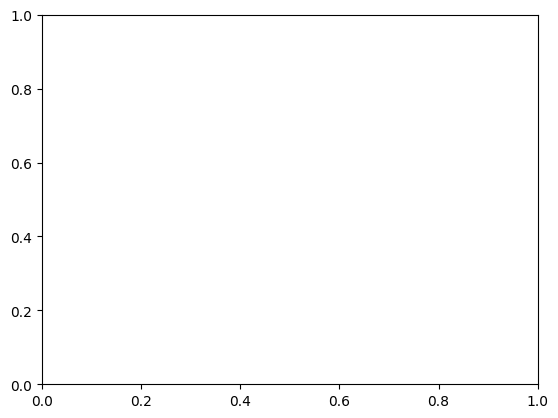

In [24]:
rel = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']

width = 0.2
x = np.arange(9)

# plot data in grouped manner of bar type 
plt.bar(x-0.2, df['AQI'], width) 
plt.bar(x+0.2, df['RespiratoryCases'], width)
plt.xticks(x, ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']) 
plt.xlabel("Relações") 
plt.ylabel("Quantidade") 
plt.show()